In [11]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.data import shepp_logan_phantom

In [12]:
# Step 1. Image Acquisition
image = shepp_logan_phantom()
image = (image * 255).astype(np.uint8)

In [13]:
# Step 2. Fourier Transform (Frequency Domain)
f_transform = np.fft.fft2(image)
f_shift = np.fft.fftshift(f_transform)
magnitude_spectrum = 20 * np.log(np.abs(f_shift))

In [14]:
# Step 3. Filter Simulation
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2
r = 30

In [18]:
y, x = np.ogrid[:rows, :cols]
mask_area = (x - ccol)**2 + (y - crow)**2 <= r*r

In [19]:
# Low Pass Filter
mask_low = np.zeros((rows, cols), np.uint8)
mask_low[mask_area] = 1

f_shift_low = f_shift * mask_low
f_inverse_low = np.fft.ifftshift(f_shift_low)
img_back_low = np.abs(np.fft.ifft2(f_inverse_low))

In [20]:
# High Pass Filter
mask_high = np.ones((rows, cols), np.uint8)
mask_high[mask_area] = 0

f_shift_high = f_shift * mask_high
f_inverse_high = np.fft.ifftshift(f_shift_high)
img_back_high = np.abs(np.fft.ifft2(f_inverse_high))

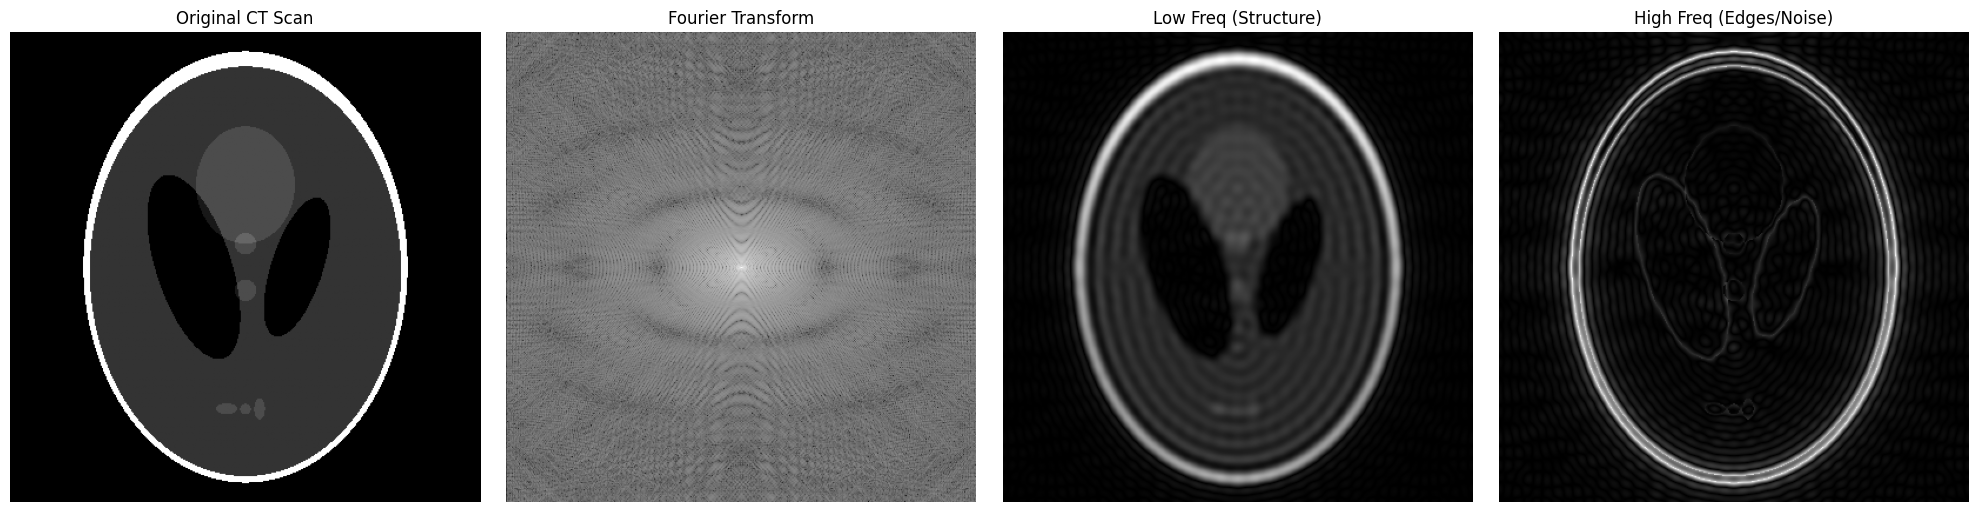

In [21]:
# Step 4. Visualization
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Original
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original CT Scan')
axes[0].axis('off')

# Frequency Domain
axes[1].imshow(magnitude_spectrum, cmap='gray')
axes[1].set_title('Fourier Transform')
axes[1].axis('off')

# Low Pass (Structure)
axes[2].imshow(img_back_low, cmap='gray')
axes[2].set_title('Low Freq (Structure)')
axes[2].axis('off')

# High Pass (Edges)
axes[3].imshow(img_back_high, cmap='gray')
axes[3].set_title('High Freq (Edges/Noise)')
axes[3].axis('off')

plt.tight_layout()
plt.savefig('fourier_comparison.png')

# Discussion Points:

1. How frequency filtering is used to enhance or remove details:

    In the frequency domain, the position of a pixel represents a specific frequency, not a spatial location.

    Center of the Spectrum (Low Frequencies): These represent large, slow-changing features like the overall shape of the skull, the background intensity, and smooth gradients.

    Outer Regions (High Frequencies): These represent rapid changes in intensity, which physically represent edges, sharp details, and noise.

    Filtering is simply the process of creating a "mask" to multiply against the spectrum. It can
    - Remove Details: This is done by using a Low Pass Smoothing Filter, we only allow frequencies below a certain point (Generally the center of the image) to pass and block the outer regions or edges. 

    - Enhance Details: This is done by using a High Pass Edge Detection Filter, by blocking the center and keeping only the outer region we remove the smooth gradients. 

2. Applications:

    - Medical Imaging (MRI & CT): Noise Reduction by Radiologists due to static noise in medical sensors, or Artifact Removal by Doctors upon applying a Notch Filter to remove interferences from the final image.

    - Compression:  When you save a photo as a JPEG, the algorithm converts small blocks of the image into the frequency domain.

    - Image Reconstruction: In MRI, the machine does not take a picture of the brain directly. It captures raw data in the frequency domain. The image we see is actually the output of the process. The Fourier Transform is what the machine actually sees. To reconstruct the image for the doctor, the computer must perform an Inverse Fourier Transform. Without this math, an MRI is just a meaningless collection of frequencies.